# **Import Libraries and modules**



```
# Fourth Iteration:
1. The improvement in accuracy at the end of 3rd iteration is very slow and hence planning to apply a learning rate using a scheduler with ADAM/SGD so that we reach required accuracy at optimum speed.
2. Adding drop out to prevent overfitting and to improve the validation or test accuracy.
3. Reducing the number of kernels to reduce the parameters to less than 15K



In [0]:
# https://keras.io/
# Installing Keras Library. This is designed to run on top of the tensorflow framework
!pip install -q keras
import keras

In [0]:
# Importing all the required classes from numpy and keras libraries. We will be calling the methods from these classes to perform required action in our following code.
import numpy as np


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

from keras.datasets import mnist
from keras.regularizers import l2
from keras import regularizers


### Load pre-shuffled MNIST data into train and test sets

In [0]:
# Downloading MNIST Dataset and also spliting the data into Test and Train set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


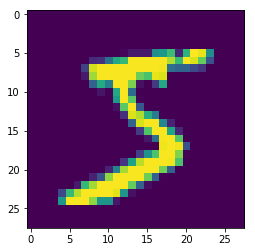

In [50]:
# Printing the shape of Training set dimensions this will help to be able to pass the input layer dimesions to the neural network.
# Viewing the first image from training set to get an idea of the images in training set. 
# So it appears that we have 60,000 samples in our training set, and the images are 28 pixels x 28 pixels each. We can confirm this by plotting the first sample in matplotlib
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# All gray scale images will have only one channel and that needs to be explicity mentioned. So, we are reshaping all the training and test images to 28*28*1. 
# Specifically mentioning only one channel.
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Since it is a gray scale image. All the values will be in the range of 0 to 255. Hence normalizing the values to the range of 0 to 1.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [55]:
# Since it is a gray scale image. All the values will be in the range of 0 to 255. Hence normalizing the values to the range of 0 to 1.
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Using categorical function to get a one hot encoding of the output values. This will help perform the loss function calculations 
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [28]:
#Looking at the first ten rows of one hot encoded values of training set
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [57]:
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean,datagen.std))
# calculate the mean on the test dataset
datagen.fit(X_test)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean,datagen.std))


Data Generator mean=0.131, std=0.308
Data Generator mean=0.133, std=0.310


In [58]:
train_generator = datagen.flow(X_train,Y_train,batch_size=128,shuffle=False)
batchX, batchy = train_generator.next()
print(batchX.shape,batchX.mean(),batchX.std())

(128, 28, 28, 1) -0.016303241 0.9803502


In [31]:
# demonstrate effect on entire training dataset
test_generator = datagen.flow(X_test,Y_test,batch_size=128,shuffle=False)
batchX, batchy = test_generator.next()
print(batchX.shape,batchX.mean(),batchX.std())

(128, 28, 28, 1) -0.045750923 0.94554704


In [59]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [60]:
from keras.layers import Activation
model = Sequential()


 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(32, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Convolution2D(10, 1, 1)) 
model.add(Activation('relu'))


model.add(Convolution2D(16, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))


#model.add(Convolution2D(10, 1, 1, activation='relu')) 

model.add(Convolution2D(16, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(10, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(10, 6, 6))
model.add(Activation('relu'))


model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipyk

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_17 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_18 (Activation)   (None, 24, 24, 32)        0         
__________

In [62]:
# Retrieve the saved best results
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#This is to store the weights of the best accuracy to mounted drive
from keras.callbacks import ModelCheckpoint
filepath="/content/gdrive/My Drive/Ramjee-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
# custom code to calculate l2 regularized cost
import numpy as np
def compute_cost_with_regularization(Y_test,y_pred):
  squared_weight = 0
  for modelLayer in model.layers:
    squared_weight = squared_weight + np.sum(np.sum(np.sum(np.square(modelLayer.get_weights()))))
  print(squared_weight)

  lambda_variable = 1e-4
  L2_regularization_cost = (lambda_variable * squared_weight)/(2*128)
  Loss = keras.losses.categorical_crossentropy(Y_test,y_pred) + L2_regularization_cost
  return Loss


In [66]:
#model.compile(loss='categorical_crossentropy',
 #            optimizer='adam',
  #           metrics=['accuracy'])

from keras.optimizers import Adam, SGD
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
model.compile(loss=compute_cost_with_regularization, optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit_generator(
        train_generator,
        steps_per_epoch=128,
        epochs=40,
        validation_data=test_generator,
        callbacks=callbacks_list,
        validation_steps=600) 



472.1198822259903
Epoch 1/40
128/128 [==============================] - 13s 102ms/step - loss: 0.6044 - acc: 0.7751 - val_loss: 0.5336 - val_acc: 0.7867

Epoch 00001: val_acc improved from 0.75456 to 0.78673, saving model to /content/gdrive/My Drive/Ramjee-01-0.79.hdf5
Epoch 2/40
128/128 [==============================] - 9s 67ms/step - loss: 0.5738 - acc: 0.7764 - val_loss: 0.5303 - val_acc: 0.7844

Epoch 00002: val_acc did not improve from 0.78673
Epoch 3/40
128/128 [==============================] - 8s 66ms/step - loss: 0.5613 - acc: 0.7763 - val_loss: 0.5200 - val_acc: 0.7894

Epoch 00003: val_acc improved from 0.78673 to 0.78938, saving model to /content/gdrive/My Drive/Ramjee-03-0.79.hdf5
Epoch 4/40
128/128 [==============================] - 8s 65ms/step - loss: 0.5383 - acc: 0.7850 - val_loss: 0.5336 - val_acc: 0.7859

Epoch 00004: val_acc did not improve from 0.78938
Epoch 5/40
128/128 [==============================] - 8s 65ms/step - loss: 0.5435 - acc: 0.7833 - val_loss: 0.50

In [0]:
#loading of weights from the drive for the epoch with best accuracy
model.load_weights('/content/gdrive/My Drive/Ramjee-23-0.79.hdf5')

In [0]:
#run the evaluation for the predictions
score = model.evaluate_generator(test_generator,steps=600)

In [71]:
print(score)

[0.4875726602098059, 0.7943985476741738]


In [0]:
predicted_classes = model.predict_classes(X_test)
correct = np.nonzero(predicted_classes==y_test)
incorrect = np.nonzero(predicted_classes!=y_test)
arincorr = incorrect[0][0:25]

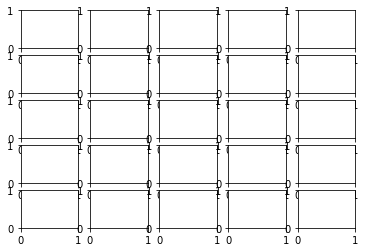

In [73]:
import matplotlib.pyplot as plt

plt.figure(0)
for i in range(5):
    for j in range(5):
        plt.subplot2grid((5,5), (i,j))
plt.show()

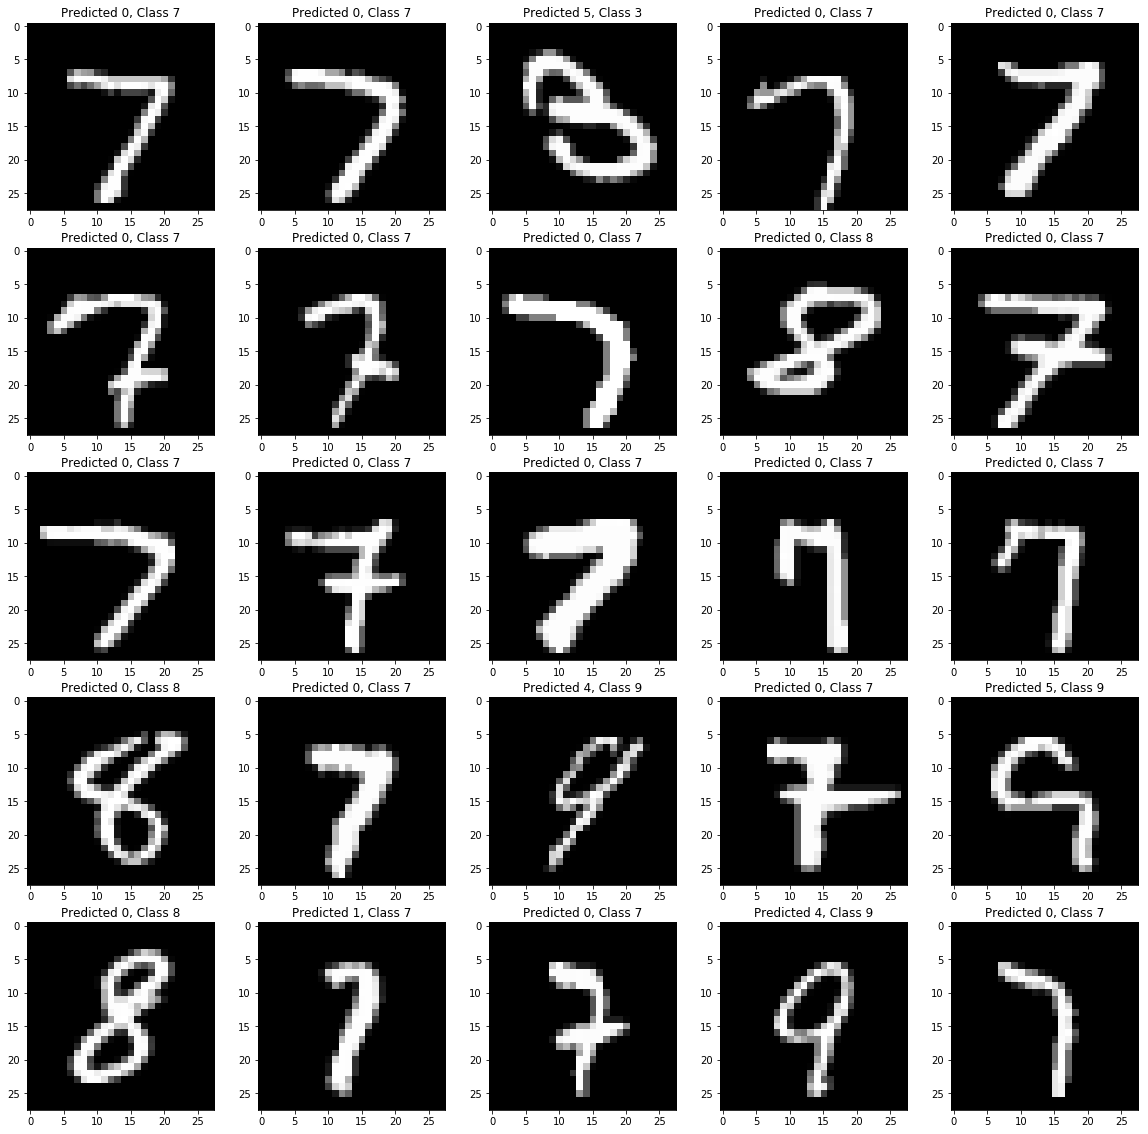

In [74]:
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(0)
plt.figure(figsize = (20,20)) 
plots = []
count = 0
for i in range(5):
    for j in range(5):
        ax = plt.subplot2grid((5,5), (i,j))
        plt.imshow(X_test[arincorr[count]].reshape(28,28),cmap='gray',interpolation='none')
        plt.title("Predicted {}, Class {}".format(predicted_classes[arincorr[count]], y_test[arincorr[count]]))
        count = count+1
plt.show()

In [0]:
y_pred = model.predict(X_test)

In [76]:
print(y_pred[:9])
print(y_test[:9])

[[1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.2184790e-03 8.3836973e-02 9.1414613e-01 1.1406454e-04 1.1406454e-04
  1.1406454e-04 1.1406454e-04 1.1406454e-04 1.1406454e-04 1.1406454e-04]
 [4.9207032e-05 9.9946386e-01 4.9207032e-05 4.9207032e-05 1.4249068e-04
  4.9207032e-05 4.9207032e-05 4.9207032e-05 4.9207032e-05 4.9207032e-05]
 [9.9926454e-01 5.7113873e-05 5.7113873e-05 5.7113873e-05 5.7113873e-05
  5.7113873e-05 2.7857083e-04 5.7113873e-05 5.7113873e-05 5.7113873e-05]
 [6.2202735e-06 1.6685296e-04 6.2202735e-06 6.2202735e-06 9.9978167e-01
  6.2202735e-06 6.2202735e-06 6.2202735e-06 6.2202735e-06 8.0162235e-06]
 [3.6693829e-05 9.9963200e-01 3.6693829e-05 3.6693829e-05 7.4413751e-05
  3.6693829e-05 3.6693829e-05 3.6693829e-05 3.6693829e-05 3.6693829e-05]
 [8.7773748e-05 7.0855359e-04 8.7773748e-05 8.7773748e-05 9.9858922e-01
  8.7773748e-05 8.7773748e-05 8.7773748e-05 8.7773748e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

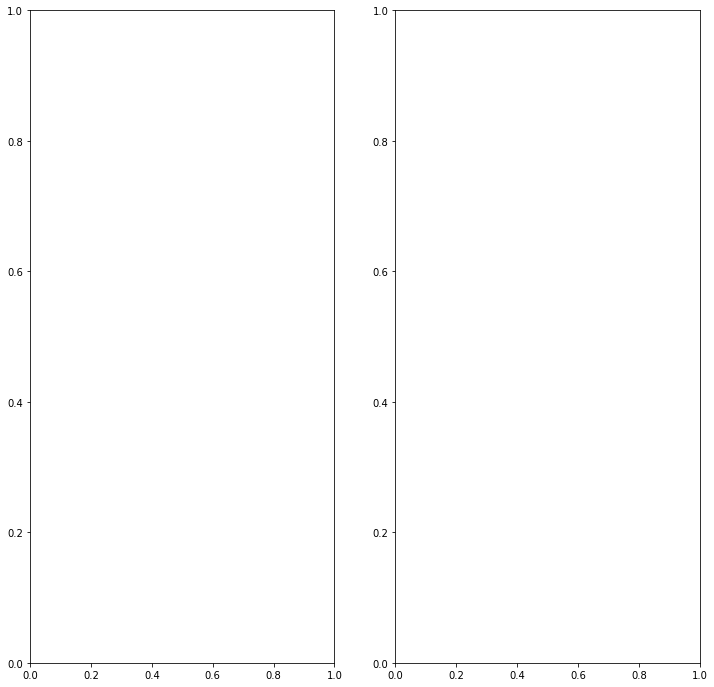

In [45]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()